<a href="https://colab.research.google.com/github/suchitra2020180/RS_GIS_Python/blob/main/Project1_Analyzing_Primate_Distribution_in_protected_areas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Overview**:

The objective of this project is to perform spatial analysis on the distribution of Galagos (a type of primate) in relation to protected areas in Tanzania and Malawi. The analysis utilizes Python's powerful geospatial libraries, such as pandas and geopandas, to read and process spatial data, perform spatial joins, and export the results for further use.

**Data Sources:**

Galagos Point Locations: A dataset containing the geographic coordinates of Galagos observations in Tanzania and Malawi, provided in an Excel format [Github](https://github.com/ulfboge/galago-wdpa/blob/main/data/Galagos_TZ_MW.xlsx).
Protected Areas: A shapefile dataset from the World Database on Protected Areas (WDPA) for August 2024, representing protected areas in the study region.[Download here 'WDPA_WDOECM_Nov2024_Public_all_shp'](https://www.protectedplanet.net/en/search-areas?filters%5Bdb_type%5D%5B%5D=wdpa)
Project Workflow

**Data Import:**

 Reading point data from an Excel file and protected area data from a shapefile.
Geospatial Data Creation: Converting the Galagos point data into a GeoDataFrame with a specified coordinate reference system (CRS).
Spatial Join: Performing a spatial join to determine which Galagos observations intersect with protected areas.
Export Results: Saving the spatial join results to a GeoPackage file for further analysis.

**Key Technologies:**
Python: The primary programming language used for the analysis.
pandas: Used for data manipulation and analysis.
geopandas: Extended the capabilities of pandas to allow for spatial operations on geometric types.
google colab: Used to write, document, and execute the code interactively.


**Conclusion: **

This project demonstrates how to combine and analyze spatial datasets using Python, focusing on practical applications in environmental and ecological studies. The resulting workflow can be adapted to similar geospatial analysis projects.

Acknowledgments:

This project was completed as part of the Python Foundation for Spatial Analysis course offered by Spatial Thoughts. Special thanks to the instructor Ujaval Gandhi

In [ ]:
Dat:
https://github.com/ulfboge/galago-wdpa/blob/main/data/Galagos_TZ_MW.xlsx

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import os
data_folder='data'
output_folder='output'

main_folder='/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python'
data_folder_path = os.path.join(main_folder,data_folder)
output_folder_path =os.path.join(main_folder,output_folder)
if not os.path.exists(data_folder_path):
  os.mkdir(data_folder_path)

if not os.path.exists(output_folder_path):
  os.mkdir(output_folder_path)

Get data from drive

In [64]:
data_folder = '/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data'
excel_file='Galagos_TZ_MW.xlsx'
galagos_data =os.path.join(data_folder,excel_file)

Import libraries

In [65]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [76]:
gala_df = pd.read_excel(galagos_data)
gala_df.head()

,species,country,locality,x_coord,y_coord,altitude,habitat,year_obs,reference,notes,entered in database
0,Galagoides zanzibaricus,Tanzania,Amani,35.50000,-5.07000,NaN,Montane evergreen,NaN,NaN,NaN,2007-03-18
1,Galagoides orinus,Tanzania,Amani,35.50000,-5.07000,NaN,Montane evergreen,NaN,Honess 1996,NaN,2007-03-18
2,Galagoides zanzibaricus,Tanzania,Amani Nature Reserve,38.71667,-5.01667,NaN,NaN,NaN,A. Perkin unpub. data; Schwarz 1931,NaN,2007-03-19
3,Galagoides orinus,Tanzania,Amani West,38.35000,-5.07000,NaN,NaN,NaN,Bearder et al. 1995,NaN,2007-03-18
4,Galagoides zanzibaricus,Tanzania,Amboni,39.06667,-5.05000,NaN,NaN,NaN,"Swynnerton, 1951",NaN,2007-03-19


In [7]:
gala_df.shape

(406, 11)

In [8]:
gala_df.columns

Index(['species', 'country', 'locality', 'x_coord', 'y_coord', 'altitude',
       'habitat', 'year_obs', 'reference', 'notes', 'entered in database'],
      dtype='object')

In [14]:
cols = ['altitude','year_obs','notes']
gala_df['altitude'].unique()

array([nan, '1050-1500', '1350-2500', '300-2050', '1240-1540', '120-280',
       '180-270', '300-650', '560-1100', 1524, '700 (1350-2350)',
       '100-200', '100-105', 284, 1680, 735, '1000-1200', '<700m', 750,
       980, 1676, '150-300', '465-885', '100-300', 50, '200-450', 630,
       1200, '700-760', 732, '1350-2350', 0, '7800-8500 ft', '6000ft',
       '6100ft'], dtype=object)

In [13]:
gala_df['year_obs'].unique()

array([nan, 1996, '1991-2000', 1993, 1905, 2000, '1998-2006', 1954, 1894,
       1864, 1937, 1953, 1955, 1919, 1906, 2005, 1922, 1928, 1985, 1911,
       1859, '?', 1907, '1938, 1954', 1969, 1909, 1930, 1904, 1873],
      dtype=object)

In [15]:
gala_df['notes'].unique()

array([nan, 'questionable', '3528-58; 805-32',
       'Otolemur garnettii panganiensis', 'G. udzungwensis type locality',
       'Holotype Otolemur panganiensis', 'Pemba Island',
       'G. udzungwensis; 3528-58; 805-32', 'Possibly Galago senegalensis',
       'questionable ', 'Zanzibar', 'Galago senegalensis braccatus',
       'Paratype; Galago zanzibaricus granti; Galago moholi Thomas 1894',
       '(this species?)',
       'Mountains south of; Holotype; Coordinates for Liwonde Forest Reserve',
       'Galago nyasae; the rapids on the Zambesi above Tette',
       'Galago senegalensis zanzibaricus', 'London NHM ZD.1954.746-749',
       'Proposed Holotype; London NHM ZD.1964.1970',
       'London NHM ZD. 1907.6.2.7-8', 'Galago senegalnesis moholi',
       'Coordinates on Magambo Hills', 'G. zanzibaricus',
       'Galago zanzibaricus granti; Galago senegalnesis moholi',
       'Galago mossambicus, G. moholi; listed under G. nyasae ',
       'London NHM ZD. 1906.11.8.5-10',
       'which

In [20]:
#Checking id there are any missing values in x_coord, y_coord
gala_df[['x_coord','y_coord']].isnull().sum()
#Result: no missing values

,0
x_coord,0
y_coord,0


In [21]:
gala_df[['x_coord','y_coord']].shape

(406, 2)

In [22]:
gala_df[['x_coord','y_coord']].dropna()

,x_coord,y_coord
0,35.50000,-5.07000
1,35.50000,-5.07000
2,38.71667,-5.01667
3,38.35000,-5.07000
4,39.06667,-5.05000
...,...,...
401,39.28000,-6.22000
402,39.33000,-6.20000
403,39.26000,-6.18000
404,39.23000,-6.17000


In [77]:
#Creating a geodataframe
geometry=gpd.points_from_xy(gala_df['x_coord'],gala_df['y_coord'])
crs = 'EPSG:4326'
gala_gdf = gpd.GeoDataFrame(gala_df,geometry=geometry,crs=crs)
gala_gdf.head()

,species,country,locality,x_coord,y_coord,altitude,habitat,year_obs,reference,notes,entered in database,geometry
0,Galagoides zanzibaricus,Tanzania,Amani,35.50000,-5.07000,NaN,Montane evergreen,NaN,NaN,NaN,2007-03-18,POINT (35.5 -5.07)
1,Galagoides orinus,Tanzania,Amani,35.50000,-5.07000,NaN,Montane evergreen,NaN,Honess 1996,NaN,2007-03-18,POINT (35.5 -5.07)
2,Galagoides zanzibaricus,Tanzania,Amani Nature Reserve,38.71667,-5.01667,NaN,NaN,NaN,A. Perkin unpub. data; Schwarz 1931,NaN,2007-03-19,POINT (38.71667 -5.01667)
3,Galagoides orinus,Tanzania,Amani West,38.35000,-5.07000,NaN,NaN,NaN,Bearder et al. 1995,NaN,2007-03-18,POINT (38.35 -5.07)
4,Galagoides zanzibaricus,Tanzania,Amboni,39.06667,-5.05000,NaN,NaN,NaN,"Swynnerton, 1951",NaN,2007-03-19,POINT (39.06667 -5.05)


<Axes: >

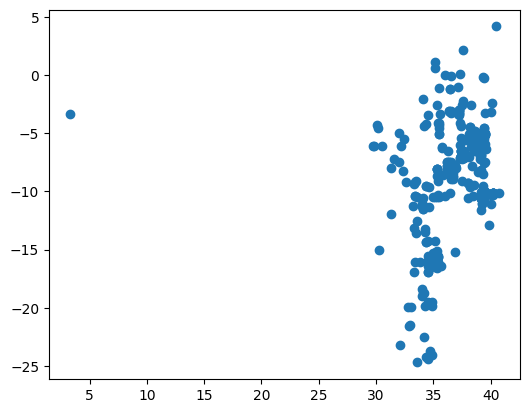

In [52]:
gala_gdf.plot()

In [110]:
#Importing protected areas shape file
path='/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/WDPA_WDOECM_Nov2024_Public_all_shp_2/WDPA_WDOECM_Nov2024_Public_all_shp-points.shp'
wdpa_gdf = gpd.read_file(path)


In [82]:
wdpa_gdf.head()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry
0,555715011.0,555715011,1,Honhouévé de Dogbo Ahomey,Honhouévé de Dogbo Ahomey,Forêt Sacrée,Sacred Forest,National,II,Not Applicable,...,Local Management Committee set up by members o...,Not Reported,Expert Verified,2018,Not Reported,BEN,BEN,Not Applicable,Not Applicable,MULTIPOINT (1.78317 6.79816)
1,555681859.0,555681859,1,Bamézoun,Bamézoun,Forêt Sacrée,Sacred Forest,Not Applicable,II,Not Applicable,...,Local management committee Bamézoun,Not Reported,Expert Verified,1980,Not Reported,BEN,BEN,Not Applicable,Not Applicable,MULTIPOINT (2.54904 6.48464)
2,555681858.0,555681858,1,Orozoun,Orozoun,Forêt Sacrée,Sacred Forest,Not Applicable,II,Not Applicable,...,Local management committee,Not Reported,Expert Verified,1980,Not Reported,BEN,BEN,Not Applicable,Not Applicable,MULTIPOINT (2.70498 6.49628)
3,555681857.0,555681857,1,Têdozoun,Têdozoun,Forêt Sacrée,Sacred Forest,Not Applicable,II,Not Applicable,...,Local management committee,Not Reported,Expert Verified,1980,Not Reported,BEN,BEN,Not Applicable,Not Applicable,MULTIPOINT (2.15076 6.6632)
4,555721459.0,555721459,1,Kouayoti,Finfingou,Forêt Sacrée,Sacred Forest,National,VI,Not Applicable,...,Comité de gestion de la forêt sacrée de Handou...,Not Reported,Expert Verified,2020,Not Reported,BEN,BEN,Not Applicable,Not Applicable,MULTIPOINT (1.12751 10.51603)


In [29]:
wdpa_gdf.columns

Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'REP_AREA', 'NO_TAKE', 'NO_TK_AREA', 'STATUS',
       'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE', 'MANG_AUTH', 'MANG_PLAN', 'VERIF',
       'METADATAID', 'SUB_LOC', 'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ',
       'geometry'],
      dtype='object')

<Axes: >

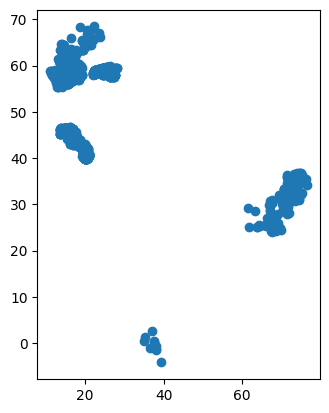

In [111]:
wdpa_gdf.plot()

In [84]:
wdpa_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

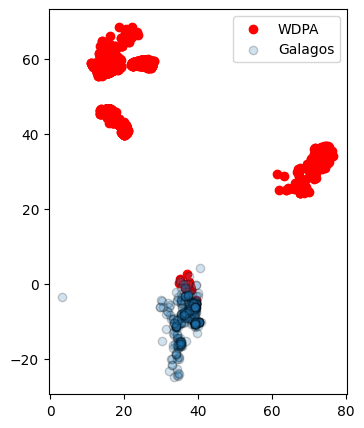

In [112]:
fig, ax = plt.subplots(figsize=(8,5))
wdpa_gdf.plot(ax=ax, color='red',label='WDPA')
gala_gdf.plot(ax=ax, edgecolor='black',alpha=0.2,label='Galagos')
plt.legend()
plt.show()

In [114]:
# Combine both dataframes spatially
# Performing a spatial join between Galagos locations and protected areas
intersected_df=gpd.sjoin(gala_gdf,wdpa_gdf,how='left',predicate='intersects')

In [118]:
intersected_df.head()

,species,country,locality,x_coord,y_coord,altitude,habitat,year_obs,reference,notes,...,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ
0,Galagoides zanzibaricus,Tanzania,Amani,35.50000,-5.07000,NaN,Montane evergreen,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Galagoides orinus,Tanzania,Amani,35.50000,-5.07000,NaN,Montane evergreen,NaN,Honess 1996,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Galagoides zanzibaricus,Tanzania,Amani Nature Reserve,38.71667,-5.01667,NaN,NaN,NaN,A. Perkin unpub. data; Schwarz 1931,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Galagoides orinus,Tanzania,Amani West,38.35000,-5.07000,NaN,NaN,NaN,Bearder et al. 1995,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Galagoides zanzibaricus,Tanzania,Amboni,39.06667,-5.05000,NaN,NaN,NaN,"Swynnerton, 1951",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

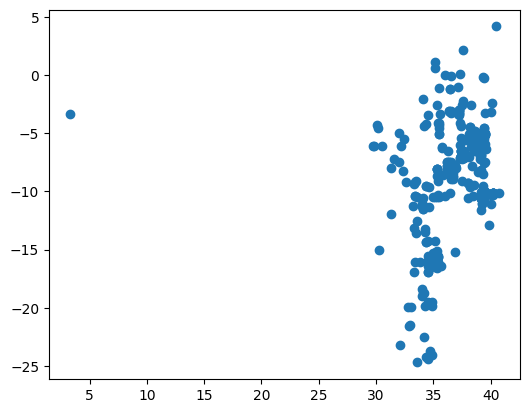

In [119]:
intersected_df.plot()

In [116]:
common_df=gpd.sjoin(gala_gdf,wdpa_gdf,how='left',predicate='overlaps')
common_df.head()

,species,country,locality,x_coord,y_coord,altitude,habitat,year_obs,reference,notes,...,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ
0,Galagoides zanzibaricus,Tanzania,Amani,35.50000,-5.07000,NaN,Montane evergreen,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Galagoides orinus,Tanzania,Amani,35.50000,-5.07000,NaN,Montane evergreen,NaN,Honess 1996,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Galagoides zanzibaricus,Tanzania,Amani Nature Reserve,38.71667,-5.01667,NaN,NaN,NaN,A. Perkin unpub. data; Schwarz 1931,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Galagoides orinus,Tanzania,Amani West,38.35000,-5.07000,NaN,NaN,NaN,Bearder et al. 1995,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Galagoides zanzibaricus,Tanzania,Amboni,39.06667,-5.05000,NaN,NaN,NaN,"Swynnerton, 1951",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

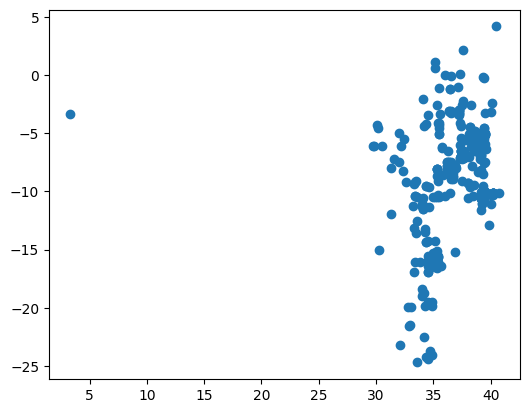

In [117]:
common_df.plot()

In [122]:
#Savin the output
output='galagos_wdpa.gpkg'
output_file_path=os.path.join(output_folder_path,output)
intersected_df.to_file(output_file_path,driver="GPKG")
print(f'Output saved successfully saved in {output_file_path}')

Output saved successfully saved in /content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/output/galagos_wdpa.gpkg


Conclusion:
This notebook demonstrates how to perform basic spatial analysis using Python by combining point data and polygon data, performing a spatial join, and exporting the results for further us.